**Life Expectancy**

Dataset: Life Expectancy (WHO)

Dataset size: 2938x22

Model trained: Linear Regression

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df=pd.read_csv('Life Expectancy Data.csv')

**Dataset Overview**

In [106]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [108]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**Handling missing(null) values**

now as this is time series data, and we hve categorised the data based on country, we can interpolate to fill null values AND find country median to fill the rest of nan values.

In [109]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [110]:
null_count_per_country = (
    df
    .groupby("Country")
    .apply(lambda x: x.isnull().sum())
)


/tmp/ipython-input-3500787472.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isnull().sum())


In [111]:
null_count_per_country

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,1,0,4,0,...,0,1,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,1,0,7,0,...,0,1,0,0,0,0,0,0,0,0
Antigua and Barbuda,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,16,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,16,16,0,0,0,0
Viet Nam,0,0,0,0,0,0,1,0,3,0,...,0,1,0,0,16,16,0,0,0,0
Yemen,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,16,16,0,0,0,0


In [112]:
exclude_cols=['Country','Year','Status','Life expectancy','infant deaths','percentage expenditure','Measles','under-five deaths','HIV/AIDS']
feature_to_interpolate=df.columns.difference(exclude_cols)

In [113]:
#interpolation
df = df.sort_values('Year')

df[feature_to_interpolate] = (
    df.groupby('Country')[feature_to_interpolate]
      .apply(lambda x: x.interpolate())
      .reset_index(level=0, drop=True)
)


In [114]:
#filling in rest of the null values with the respective country mean for that column
df[feature_to_interpolate]=df[feature_to_interpolate].fillna(
    df.groupby('Country')[feature_to_interpolate].transform('mean')
)

In [115]:
#checking null count
null_count_per_country_after = (
    df
    .groupby("Country")
    .apply(lambda x: x.isnull().sum())
)


/tmp/ipython-input-2142189877.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isnull().sum())


In [116]:
null_count_per_country_after

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,16,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,16,16,0,0,0,0
Viet Nam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,16,16,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,16,16,0,0,0,0


In [117]:
#now the only missing values are cases where no data was available for a column with respect to tht country, so best option is to drop them
df.dropna(inplace=True)

In [118]:
#final check for null values
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [119]:
df.shape

(2128, 22)

**Outlier and Skewness detection & handling**

Using boxplots for detection and visualisation of outlier in selected numerical columns

using histplots to detect skewness

Using log transformation for handling the skewness and outliers(somewhat) in the dataset

In [120]:
print(df.columns.tolist())

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


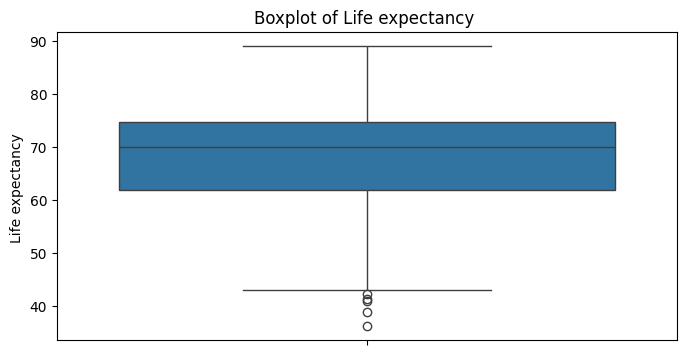

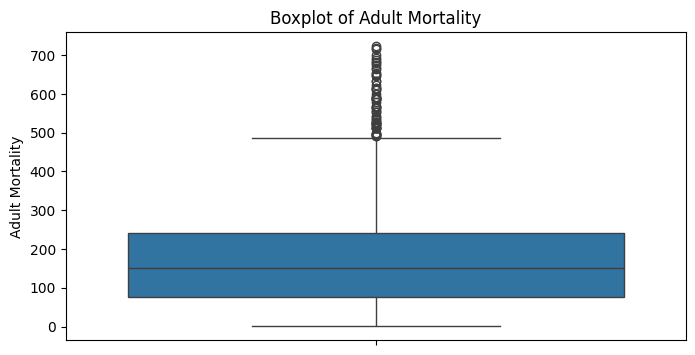

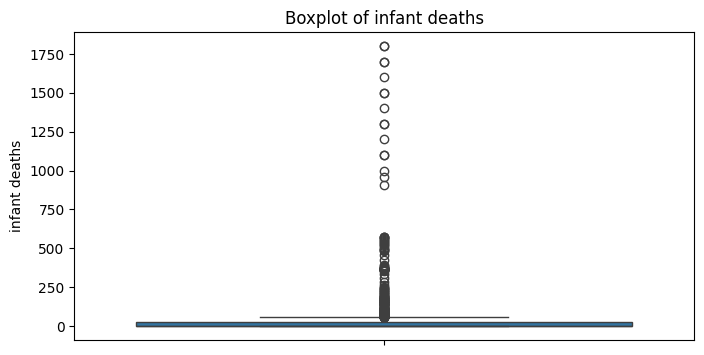

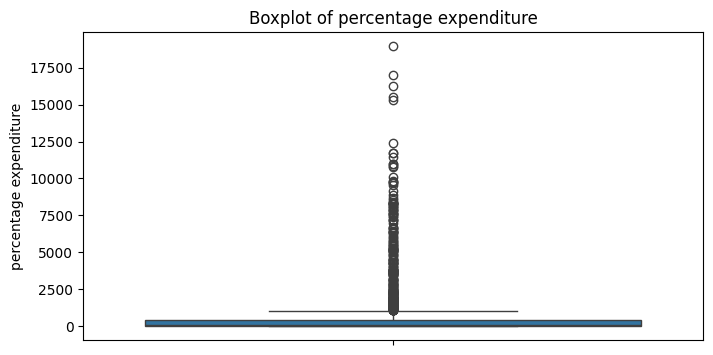

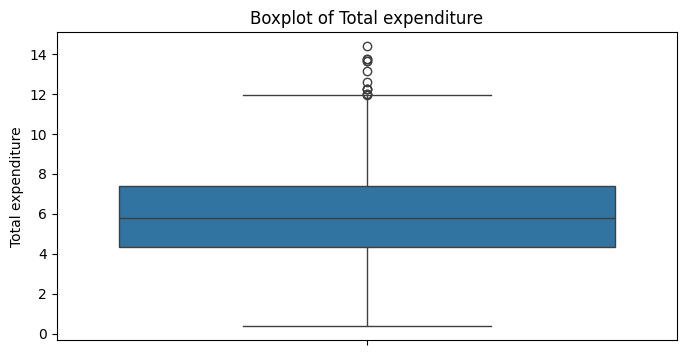

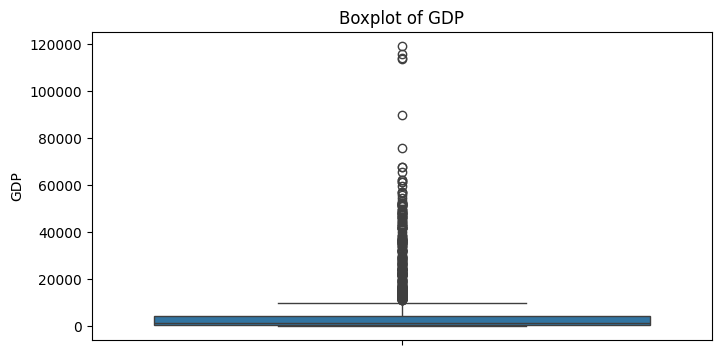

In [121]:
#listing features to check and plotting boxplot
outlier_features=['Life expectancy ','Adult Mortality','infant deaths','percentage expenditure','Total expenditure','GDP']
for col in outlier_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

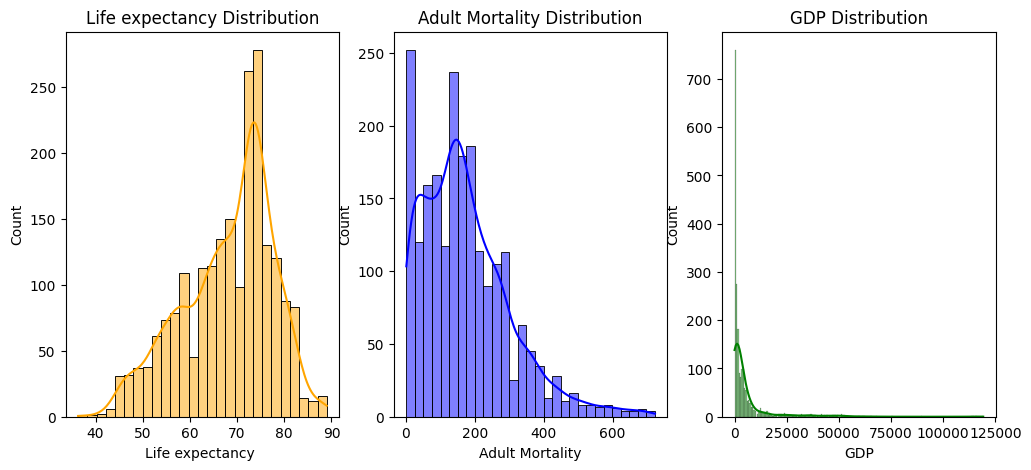

In [122]:
#checkin skewness

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Life expectancy '], kde=True, color='orange')
plt.title('Life expectancy Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Adult Mortality'], kde=True, color='blue')
plt.title('Adult Mortality Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['GDP'], kde=True, color='green')
plt.title('GDP Distribution')

plt.show()

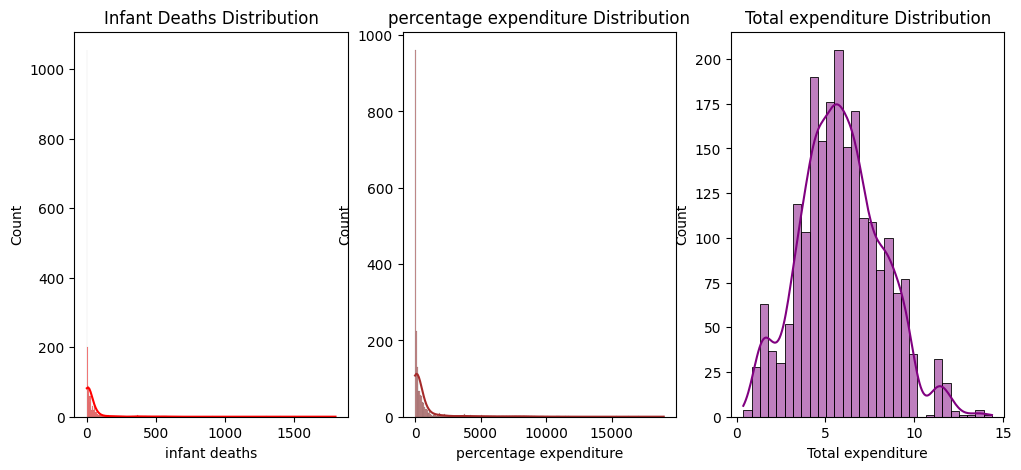

In [123]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['infant deaths'], kde=True, color='red')
plt.title('Infant Deaths Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['percentage expenditure'], kde=True, color='brown')
plt.title('percentage expenditure Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Total expenditure'], kde=True, color='purple')
plt.title('Total expenditure Distribution')

plt.show()

In [124]:
#handling skewness in percentage expenditure, and gdp using log transformation
df['percentage_expenditure_new'] = np.log1p(df['percentage expenditure'])
df['GDP_new'] = np.log1p(df['GDP'])

In [125]:
#checking if skewness reduced by comparing correlation with the target column
df[['percentage expenditure',
    'percentage_expenditure_new',
    'Life expectancy ']].corr()


,percentage expenditure,percentage_expenditure_new,Life expectancy
percentage expenditure,1.000000,0.584331,0.395555
percentage_expenditure_new,0.584331,1.000000,0.443700
Life expectancy,0.395555,0.443700,1.000000


In [126]:
df[['GDP',
    'GDP_new',
    'Life expectancy ']].corr()

,GDP,GDP_new,Life expectancy
GDP,1.000000,0.669404,0.445328
GDP_new,0.669404,1.000000,0.564730
Life expectancy,0.445328,0.564730,1.000000


Text(0.5, 1.0, 'GDP_new Distribution')

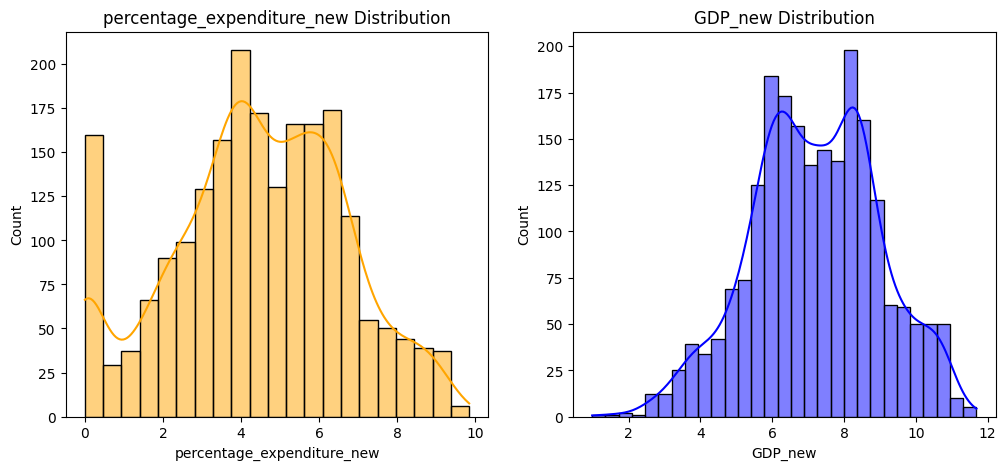

In [127]:
#plotting the transformed percentage expenditure as well as GDP
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['percentage_expenditure_new'], kde=True, color='orange')
plt.title('percentage_expenditure_new Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['GDP_new'], kde=True, color='blue')
plt.title('GDP_new Distribution')

In [128]:
#encoding- only categorical data left is developed or developing so we can use map or label encoding
df['Status']=df['Status'].map({'Developing': 0, 'Developed': 1})

In [129]:
#removing unwanted cols
remove_cols=['percentage expenditure','GDP']
df.drop(columns=remove_cols, inplace=True)

In [130]:
df.columns.to_list()

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'percentage_expenditure_new',
 'GDP_new']

**Splitting Data**

splitting the dataset into train and test subset before model training

In [131]:
#we'll drop year and country and 2 columns tht might cause duplicacy and train model
df.drop(columns=['Year','Country',' thinness 5-9 years','under-five deaths '],inplace=True)

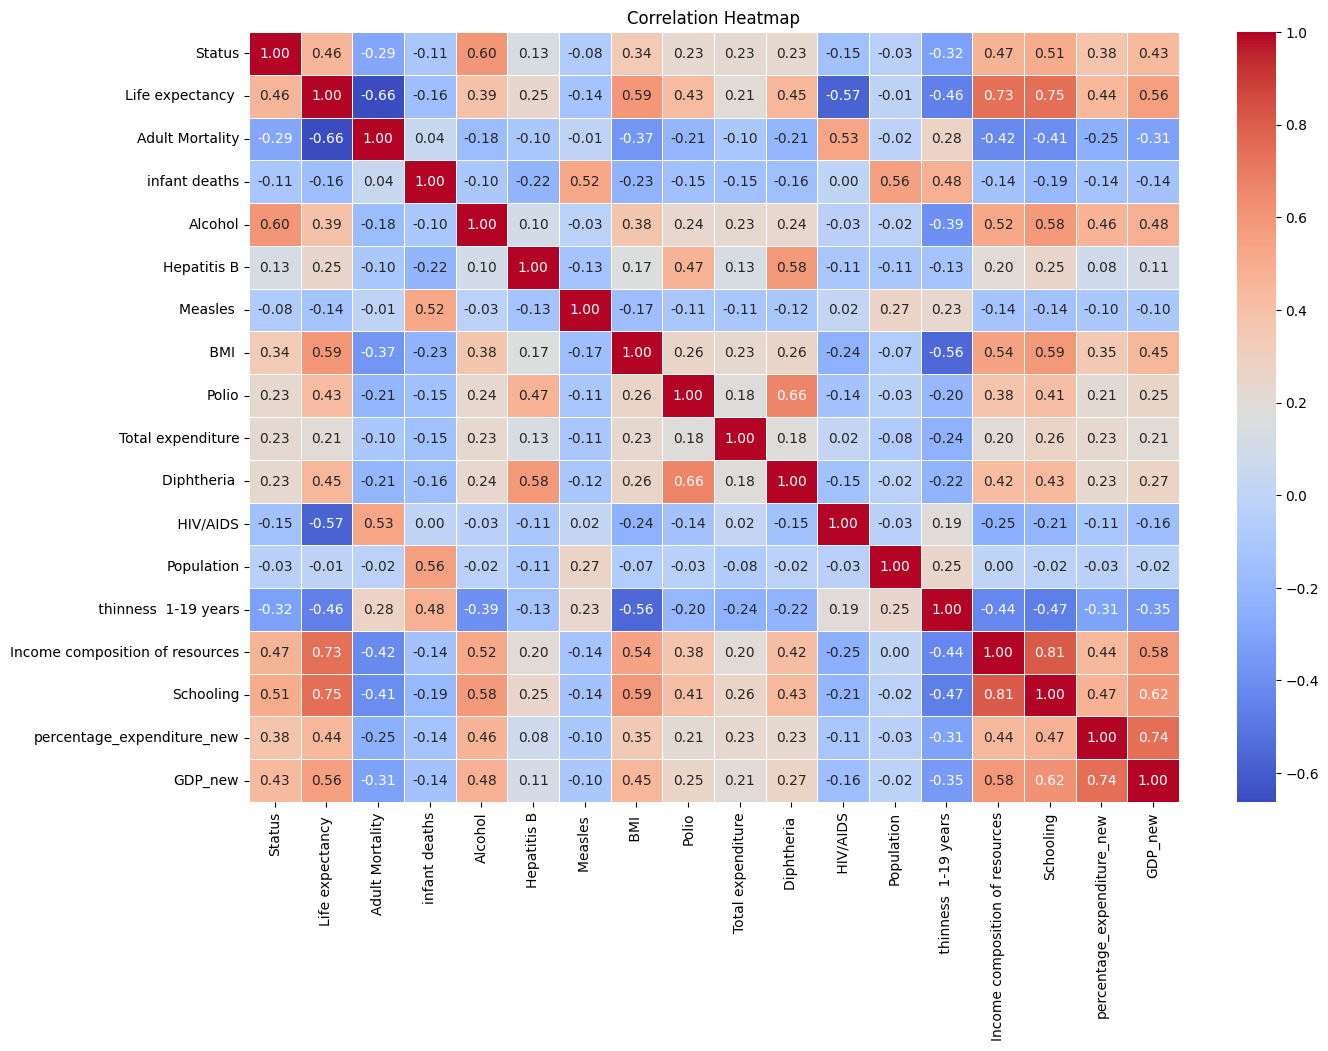

In [132]:
#plotting the correlation/ heatmap for final dataset

plt.figure(figsize=(15, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [133]:
#splitting df
from sklearn.model_selection import train_test_split

X = df.drop('Life expectancy ', axis=1)
y= df['Life expectancy ']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

**Scaling Dataset**

Using standard scaler to scale the numerical values in X

In [134]:
#scaling numerical values for df(only X_train and X_test)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training Data: {X_train_scaled.shape[0]}")
print(f"Testing Data: {X_test_scaled.shape[0]} ")

Training Data: 1702
Testing Data: 426 


**Model Training and Performance evaluation**

In [135]:
#model (linear regression on df) [Linear regression has no accuracy score so we calculate r2 score instead]
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

r2=r2_score(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)

print(f'Accuracy Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Accuracy Score: 0.8531442839164065
Root Mean Squared Error: 3.6393269095140317
